<a href="https://colab.research.google.com/github/francoisbonnard/Math/blob/main/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library 

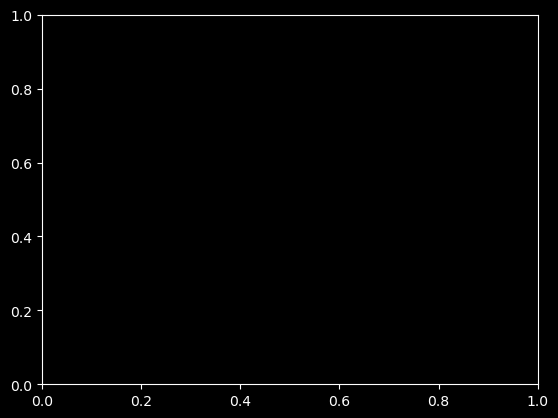

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor("black")

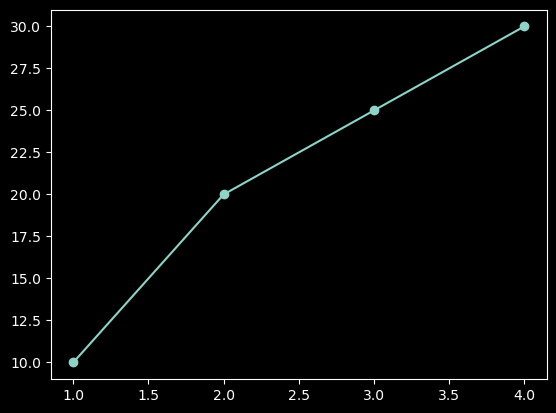

In [2]:
# Your plot code goes here
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], marker='o')

# Display the plot
plt.show()

## First Graph / Edge set

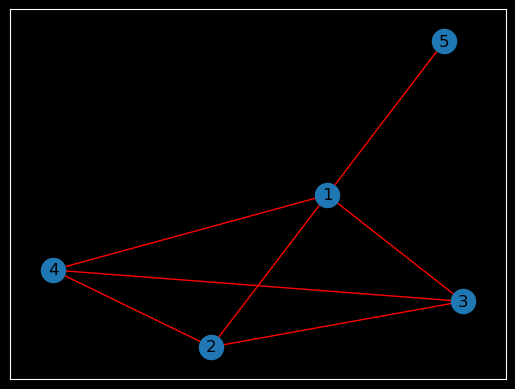

In [25]:
G= nx.Graph()
L1 = [(0,1),(1,2),(0,6),(5,6),(1,6),(2,5),(2,3),(2,4),(2,6),(1,7)]
L2 = [(1,3),(2,3),(3,4),(1,2),(1,4),(2,4),(1,5)]
G.add_edges_from(L2)
# nx.draw(G,with_labels=1,font_color='white', node_color='skyblue', edge_color='red',)
nx.draw_networkx(G,edge_color='red')
plt.show()

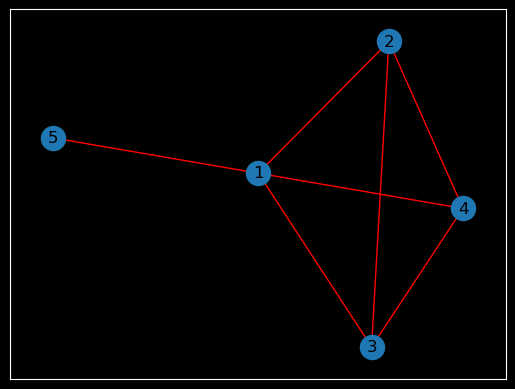

In [27]:
H=nx.from_edgelist(L2)
nx.draw_networkx(H,edge_color='red')
plt.show()

## Adjacency list

In [41]:
mylist=['adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist']
G= nx.Graph(L2)
A = nx.adjacency_matrix(G)
A.toarray()

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]], dtype=int32)

In [42]:
# Get the adjacency list
adjacency_list = nx.to_dict_of_lists(G)

# Print the adjacency list
for node, neighbors in adjacency_list.items():
    print(f"{node}: {neighbors}")

1: [3, 2, 4]
3: [1, 2, 4]
2: [3, 1, 4]
4: [3, 1, 2]


More memory efficient to use Adjacency list ?

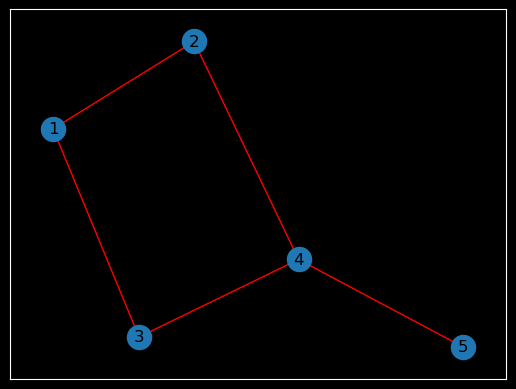

In [43]:
# Your adjacency list
adjacency_list = {
    1: [2, 3],
    2: [1, 4],
    3: [1, 4],
    4: [2, 3, 5],
    5: [4]
}

# Create a graph from the adjacency list
G = nx.from_dict_of_lists(adjacency_list)

# Optionally, draw the graph to visualize it
nx.draw_networkx(G,edge_color='red')
plt.show()

## Build adjacent Matrix from the graph

In [15]:
G = nx.Graph()
L1 = [(0,1),(1,2),(0,6),(5,6),(1,6),(2,5),(2,3),(2,4),(2,6),(1,7)]
G.add_edges_from(L1)

# Obtenir la matrice d'adjacence
adj_matrix = nx.adjacency_matrix(G)

# Convertir la matrice d'adjacence en une matrice numpy
adj_matrix_np = adj_matrix.toarray()


print("Matrice d'adjacence :")
print(adj_matrix_np)

Matrice d'adjacence :
[[0 1 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 1]
 [0 1 0 1 1 1 1 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


Cependant, il y a une nuance subtile entre todense() et toarray(). La méthode toarray() est une méthode générique que vous pouvez utiliser pour convertir divers types de matrices (sparse ou dense) en une matrice NumPy dense. En revanche, todense() est spécifique aux matrices creuses (sparse) et est une méthode de la classe scipy.sparse qui est utilisée pour représenter des matrices creuses.

En pratique, si vous savez que votre matrice est dense (c'est généralement le cas pour la matrice d'adjacence complète d'un graphe), vous pouvez utiliser l'une ou l'autre sans problème. Cependant, si votre matrice est potentiellement creuse, vous pouvez utiliser todense() pour être spécifique à la représentation sparse.

In [16]:
adj_matrix_nx = nx.adjacency_matrix(G).todense()

print("Matrice d'adjacence :")
print(adj_matrix_nx)


Matrice d'adjacence :
[[0 1 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 1]
 [0 1 0 1 1 1 1 0]
 [1 1 1 0 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]


## Directed Graph 

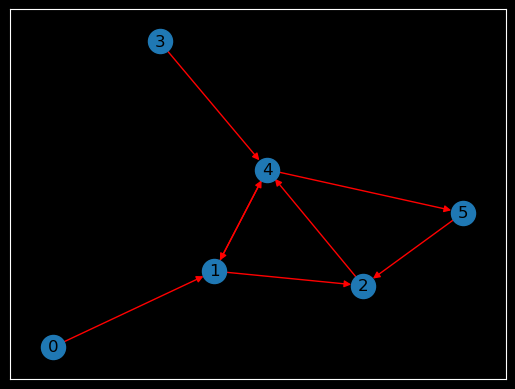

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
G= nx.DiGraph()
L = [(0,1), (1,2),(2,4),(3,4),(4,5),(5,2),(4,1),(1,4)]
G.add_edges_from(L)
# nx.draw(G,with_labels=1)
nx.draw_networkx(G,edge_color='red',with_labels=1)
plt.show()

## What is inside NX ?

In [29]:
myList = [x for x in dir(nx) if x.startswith("ad")]
myList

['adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist']

## Adjacent Matrix

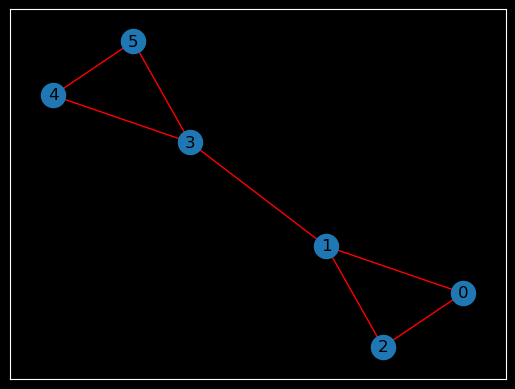

In [28]:
A = np.array([[0,1,1,0,0,0],
              [1,0,1,1,0,0],
              [1,1,0,0,0,0],
              [0,1,0,0,1,1],
              [0,0,0,1,0,1],
              [0,0,0,1,1,0]])
# G = nx.from_numpy_matrix(A)
G = nx.from_numpy_array(A)
# nx.draw(G,with_labels=1)
nx.draw_networkx(G,edge_color='red',with_labels=1)

plt.show()

## Eigenvalues and eigenvectors

In [4]:
from numpy.linalg import eigvals, eig

# Create a graph
G = nx.Graph()
edges = [(0, 1), (1, 2), (0, 6), (5, 6), (1, 6), (2, 5), (2, 3), (2, 4), (2, 6), (1, 7)]
G.add_edges_from(edges)

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Find the eigenvalues
eigenvalues = eigvals(adj_matrix)

# Find the eigenvectors
eigenvalues, eigenvectors = eig(adj_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 3.16480059e+00 -2.18019756e+00 -1.54069918e+00 -1.11535466e+00
  1.16445930e+00  5.06991515e-01 -4.42237162e-17  9.90733381e-17]

Eigenvectors:
[[-3.06286714e-01 -2.51632721e-01  2.69079724e-01  5.07545113e-01
  -4.35788347e-01  1.92970758e-01 -1.55947603e-01  5.32311970e-01]
 [-4.63761680e-01  4.78417630e-01  3.38222538e-01 -4.52137988e-01
  -3.94520028e-01 -2.85608783e-01 -5.86189308e-17  5.27463856e-17]
 [-5.09314421e-01 -6.42165901e-01  1.82139894e-01 -2.94672066e-01
   4.28124644e-01 -1.57874946e-01 -3.06684084e-17  3.69521992e-17]
 [-5.05574693e-01  7.01914133e-02 -7.52793449e-01 -1.13954818e-01
  -1.12937763e-01  3.83443319e-01  8.06985736e-17 -5.18343608e-17]
 [-3.20680272e-01  2.62349843e-01  3.70386096e-01  3.66364977e-01
   2.70672304e-01  4.44915480e-01  1.55947603e-01 -5.32311970e-01]
 [-1.60930968e-01  2.94544821e-01 -1.18218985e-01  2.64195845e-01
   3.67659604e-01 -3.11395638e-01 -7.54317356e-01  2.01914712e-01]
 [-1.60930968e-01  2.94544821e-01 -1.182189

In [5]:
u = eigenvectors[:,2]
u

array([ 0.26907972,  0.33822254,  0.18213989, -0.75279345,  0.3703861 ,
       -0.11821899, -0.11821899, -0.21952536])

## Random Graph

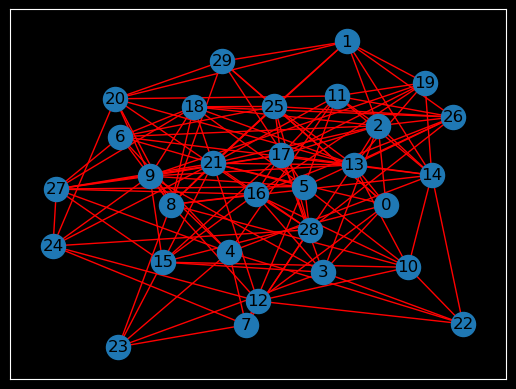

In [3]:
n = 30
p = 0.3

G = nx.generators.random_graphs.gnp_random_graph(n, p)
nx.draw_networkx(G,edge_color='red',with_labels=1)
plt.show()

In [22]:
G1 = nx.Graph()
G1.add_edge(1,2)
G1.add_edge('A','B')
G1.add_edge('B','B')
G1.add_node(print)


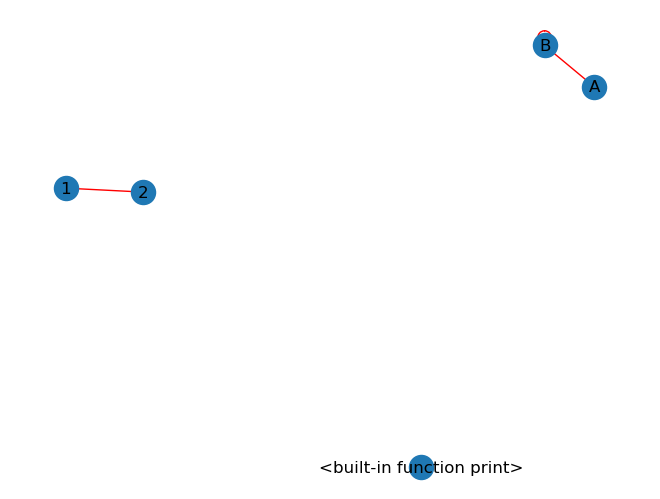

In [24]:
nx.draw_spring(G1,edge_color='red',with_labels=1)
plt.show()


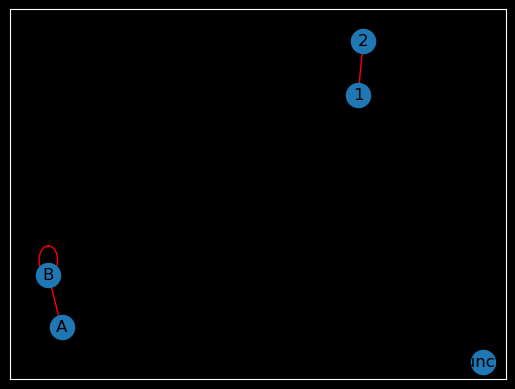

In [23]:
nx.draw_networkx(G1,edge_color='red',with_labels=1)
plt.show()
